# 1. Data handling

In [ ]:
import pandas as pd
import numpy as np
import json

# we will use nltk for sentence tokenization
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

# we will be using gensim for training
import gensim
from gensim import utils
from gensim.models.word2vec import Word2Vec
from gensim.models.fasttext import FastText
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS


# Logging settings
import logging

for handler in logging.root.handlers[:]:
   logging.root.removeHandler(handler)

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

[nltk_data] Downloading package punkt to C:\Users\Karolina
[nltk_data]     Wszola\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data =  pd.read_excel('tokensforw2v.xlsx', engine='openpyxl')

In [ ]:
data.head()

,Unnamed: 0.1,Unnamed: 0,taler,politic_party,speech,colour,variable,sentences,tokens,text_clean
0,0,0,Lars Løkke Rasmussen,Statsminister,Tak for ordet. Og tak for at jeg måtte komme h...,Blue,0,Tak for ordet,"['tak', 'for', 'ord']",tak for ord
1,1,1,Lars Løkke Rasmussen,Statsminister,"Kære alle sammen.\n\nTak, fordi jeg må være me...",Blue,0,Kære alle sammen,"['kær', 'al', 'sammen']",kær al_sammen
2,2,5,Lars Løkke Rasmussen,Statsminister,For to år siden truede den globale finanskrise...,Blue,0,For to år siden truede den globale finanskrise...,"['for', 'år', 'siden', 'true', 'den', 'global'...",for år_siden true den global finanskrise med a...
3,3,6,Lars Løkke Rasmussen,Statsminister,Danmark er et godt land at leve i. Vi har bygg...,Blue,0,Danmark er et godt land at leve i,"['danmark', 'være', 'god', 'land', 'at', 'leve...",danmark være god land at leve i
4,4,7,Lars Løkke Rasmussen,Statsminister,“I slutningen af 2015 samledes tusindvis af me...,Blue,0,“I slutningen af 2015 samledes tusindvis af me...,"['i', 'slutning', 'af', 'samledes', 'tusindvis...",i slutning af samledes tusindvis_af menneske p...


In [ ]:
data = data[['taler','speech','colour','tokens', 'text_clean']]

In [ ]:
data['text_clean'] = data['text_clean'].fillna(" ")

## 1.2. Creating an array of arrays (sentences - words)

In [ ]:
sentences = data.text_clean.tolist()

In [ ]:
len(sentences)

31930

In [ ]:
phrases = []
for sentence in sentences:
    #print(i.split())
    phrases.append(sentence.split(" "))

In [ ]:
phrases

[['tak', 'for', 'ord'],
 ['kær', 'al_sammen'],
 ['for',
  'år_siden',
  'true',
  'den',
  'global',
  'finanskrise',
  'med',
  'at',
  'vælte',
  'danmark'],
 ['danmark', 'være', 'god', 'land', 'at', 'leve', 'i'],
 ['i',
  'slutning',
  'af',
  'samledes',
  'tusindvis_af',
  'menneske',
  'på',
  'kongens',
  'nytorv',
  'i',
  'københavn',
  'foran',
  'den',
  'fransk',
  'ambassade'],
 ['først', 'og', 'fremmest', 'stor', 'tak_fordi', 'jeg', 'måtte', 'komme'],
 ['godaften'],
 ['det', 'tale', 'ord', 'gælde', 'godaften'],
 ['markering',
  'af',
  'for',
  'salg',
  'af',
  'dansk',
  'vestindien',
  'til',
  'usa',
  'your',
  'excellency',
  'governor',
  'mapp'],
 ['i',
  'dag',
  'fejre',
  'den',
  'dansk',
  'grundlovs',
  'år',
  'dag',
  'over',
  'hel_land'],
 ['det', 'være', 'kold'],
 ['danmark', 'være', 'dejlig_land'],
 ['den',
  'amerikansk_præsident',
  'obama',
  'og',
  'hans',
  'familie',
  'statsbesøg',
  'for',
  'den',
  'nordisk',
  'land',
  'i',
  'usa'],
 ['nu

# 2. Word2Vec model

In [ ]:
model = Word2Vec(sentences=phrases, 
                               vector_size=300, 
                               window=1, 
                               min_count=20, # 4 - we need this for the embedding later on (shape cant be > 5000)
                               workers=4, 
                               epochs=15)

2022-11-29 16:13:20,741 : INFO : collecting all words and their counts
2022-11-29 16:13:20,744 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-11-29 16:13:20,830 : INFO : PROGRESS: at sentence #10000, processed 115452 words, keeping 10242 word types
2022-11-29 16:13:20,914 : INFO : PROGRESS: at sentence #20000, processed 226810 words, keeping 14490 word types
2022-11-29 16:13:20,978 : INFO : PROGRESS: at sentence #30000, processed 335942 words, keeping 17596 word types
2022-11-29 16:13:20,992 : INFO : collected 17993 word types from a corpus of 353124 raw words and 31930 sentences
2022-11-29 16:13:20,994 : INFO : Creating a fresh vocabulary
2022-11-29 16:13:21,023 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=20 retains 1455 unique words (8.09% of original 17993, drops 16538)', 'datetime': '2022-11-29T16:13:21.023480', 'gensim': '4.2.0', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10

In [ ]:
model.wv.vectors

array([[ 0.18142809,  0.19273931,  0.2954578 , ..., -0.07963959,
         0.48056436,  0.04141086],
       [-0.12836167,  0.18969929, -0.09743249, ...,  0.01421213,
        -0.02069952, -0.36515838],
       [ 0.4770778 , -0.0606433 , -0.14030868, ...,  0.28899986,
         0.18796028, -0.30620587],
       ...,
       [-0.05027701,  0.21741849,  0.03059277, ..., -0.04097098,
         0.03719897, -0.04410226],
       [-0.0602585 ,  0.09426635,  0.03429839, ...,  0.0463034 ,
         0.05674047, -0.03106871],
       [ 0.09084059,  0.30517292, -0.07829548, ..., -0.07855605,
        -0.09778748, -0.1467961 ]], dtype=float32)

In [ ]:
model.wv.most_similar('trække')

[('køre', 0.8388558030128479),
 ('kaste', 0.7912517786026001),
 ('bryde', 0.7906973361968994),
 ('byde', 0.7796860337257385),
 ('melde', 0.771586537361145),
 ('rejse', 0.7579157948493958),
 ('vælte', 0.7551781535148621),
 ('træde', 0.7519628405570984),
 ('råbe', 0.7460241317749023),
 ('rykke', 0.7407512664794922)]

In [ ]:
model.wv['trække']

array([-0.02169621,  0.01828002,  0.01508081, -0.14936146,  0.11404048,
       -0.11073873,  0.12918952,  0.1661668 , -0.15036961,  0.05700037,
        0.10586891,  0.05370187, -0.23401465, -0.14328381, -0.08042762,
       -0.17328587,  0.14441587, -0.18246835, -0.40064126, -0.22644894,
       -0.17695431,  0.31627306,  0.03302656,  0.09437985,  0.05040455,
        0.02615827,  0.05006701, -0.06022662, -0.23196898, -0.02266523,
        0.16119209,  0.0882254 , -0.13448189,  0.01349488, -0.06321946,
        0.14815556, -0.06633333,  0.23228642,  0.13515365,  0.15851027,
        0.13555124, -0.1723087 ,  0.14908758, -0.01845425,  0.13574009,
        0.12420038,  0.0732944 ,  0.01940808,  0.10456292,  0.19023317,
        0.11004731,  0.05072757,  0.4018223 ,  0.08449892, -0.01365515,
       -0.08121519,  0.02002277,  0.2755967 , -0.22440836, -0.11605066,
       -0.14882836, -0.26399603, -0.16474096, -0.24135776,  0.04621838,
        0.21516168,  0.02459027,  0.07107468,  0.17153867, -0.23

In [ ]:
model.wv.key_to_index

{'være': 0,
 'og': 1,
 'i': 2,
 'vi': 3,
 'at': 4,
 'den': 5,
 'det': 6,
 'for': 7,
 'have': 8,
 'til': 9,
 'der': 10,
 'på': 11,
 'ikke': 12,
 'skulle': 13,
 'med': 14,
 'som': 15,
 'jeg': 16,
 'kunne': 17,
 'af': 18,
 'så': 19,
 'men': 20,
 'danmark': 21,
 'ville': 22,
 'de': 23,
 'blive': 24,
 'om': 25,
 'vores': 26,
 'mange': 27,
 'også': 28,
 'gøre': 29,
 'få': 30,
 'al': 31,
 'man': 32,
 'god': 33,
 'hvor': 34,
 'nogen': 35,
 'når': 36,
 'komme': 37,
 'meget': 38,
 'fra': 39,
 'eller': 40,
 'stor': 41,
 'her': 42,
 'dag': 43,
 'år': 44,
 'anden': 45,
 'nu': 46,
 'ny': 47,
 'gå': 48,
 'regering': 49,
 'derfor': 50,
 'dansker': 51,
 'land': 52,
 'sige': 53,
 'arbejde': 54,
 'se': 55,
 'hvis': 56,
 'stå': 57,
 'give': 58,
 'sig': 59,
 'selv': 60,
 'ved': 61,
 'over': 62,
 'tid': 63,
 'menneske': 64,
 'tage': 65,
 'dansk': 66,
 'verden': 67,
 'barn': 68,
 'deres': 69,
 'sætte': 70,
 'hvad': 71,
 'du': 72,
 'mere': 73,
 'end': 74,
 'måtte': 75,
 'op': 76,
 'samfund': 77,
 'bare': 78,


# 3. Data reducing using UMAP

In [ ]:
import umap.umap_ as umap
import altair as alt

In [ ]:
umap_reducer = umap.UMAP(random_state=42, n_components=2)
embeddings = umap_reducer.fit_transform(model.wv.vectors)

In [ ]:
embeddings

array([[8.819078 , 3.815358 ],
       [9.373678 , 6.7556024],
       [6.098971 , 5.998863 ],
       ...,
       [9.1291   , 7.1396747],
       [5.2264233, 3.8655074],
       [7.441289 , 3.346968 ]], dtype=float32)

In [ ]:
embeddings.shape

(1455, 2)

In [ ]:
df_plot_umap = pd.DataFrame(embeddings, columns=['x','y'])

In [ ]:
df_plot_umap

,x,y
0,8.819078,3.815358
1,9.373678,6.755602
2,6.098971,5.998863
3,8.014171,3.404591
4,7.937185,3.534043
...,...,...
1450,8.230712,4.689534
1451,8.163626,5.864484
1452,9.129100,7.139675
1453,5.226423,3.865507


In [ ]:
labels = model.wv.index_to_key

In [ ]:
df_plot_umap['labels'] = labels
df_plot_umap

,x,y,labels
0,8.819078,3.815358,være
1,9.373678,6.755602,og
2,6.098971,5.998863,i
3,8.014171,3.404591,vi
4,7.937185,3.534043,at
...,...,...,...
1450,8.230712,4.689534,alting
1451,8.163626,5.864484,indenfor
1452,9.129100,7.139675,frihedsrettighede
1453,5.226423,3.865507,reagere


In [ ]:
word_color_df =  pd.read_excel('wordscolor.xlsx', engine='openpyxl')
word_color_df=word_color_df[['feature','colors']]
word_color_df.head()

,feature,colors
0,sf,red
1,venstre,blue
2,grundlov,blue
3,grøn,red
4,mette_frederiksen,blue


In [ ]:
word_color_df.rename(columns={'feature':'labels'},inplace=True)

In [ ]:
word_color_df

,labels,colors
0,sf,red
1,venstre,blue
2,grundlov,blue
3,grøn,red
4,mette_frederiksen,blue
...,...,...
16202,populisme,blue
16203,elendig,red
16204,træffe,red
16205,upassende,red


In [ ]:
df_plot_umap2=df_plot_umap.merge(word_color_df,how='left',on='labels').dropna()
df_plot_umap2

,x,y,labels,colors
0,8.819078,3.815358,være,blue
1,9.373678,6.755602,og,blue
3,8.014171,3.404591,vi,red
4,7.937185,3.534043,at,blue
5,8.126668,6.934581,den,blue
...,...,...,...,...
1450,8.230712,4.689534,alting,blue
1451,8.163626,5.864484,indenfor,blue
1452,9.129100,7.139675,frihedsrettighede,blue
1453,5.226423,3.865507,reagere,blue


In [ ]:
len(df_plot_umap)

1455

In [ ]:
from vega_datasets import data

In [ ]:
# plot
alt.Chart(df_plot_umap2).mark_circle(size=60).encode(
    x='x',
    y='y',
    color='colors',
    tooltip=['labels','colors']
).properties(
    width=800,
    height=600
).interactive()

alt.Chart(...)

## 3.1. Clustering with KMeans

In [ ]:
from sklearn.cluster import KMeans

### 3.1.1. Elbow Method for the number of k

In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(model.wv.vectors)
    Sum_of_squared_distances.append(km.inertia_)

c:\Users\Karolina Wszola\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Karolina Wszola\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Karolina Wszola\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Karolina Wszola\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans 

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Elbow Method For Optimal k')

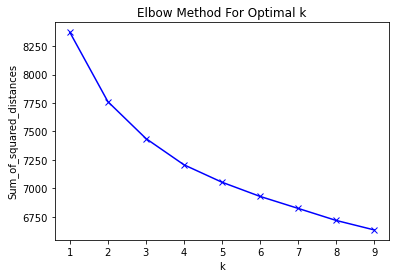

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')

### 3.1.2. Clustering and visualization

In [ ]:
clusterer = KMeans(n_clusters=5)

In [ ]:
clusterer.fit(model.wv.vectors)

c:\Users\Karolina Wszola\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
clusterer.labels_

array([1, 0, 2, ..., 0, 1, 3])

In [ ]:
df_plot_umap['cluster'] = clusterer.labels_

In [ ]:
df_plot_umap_clusters=df_plot_umap.merge(word_color_df,how='left',on='labels').dropna()

In [ ]:
df_plot_umap_clusters

,x,y,labels,cluster,colors
0,8.819078,3.815358,være,1,blue
1,9.373678,6.755602,og,0,blue
3,8.014171,3.404591,vi,3,red
4,7.937185,3.534043,at,3,blue
5,8.126668,6.934581,den,0,blue
...,...,...,...,...,...
1450,8.230712,4.689534,alting,3,blue
1451,8.163626,5.864484,indenfor,0,blue
1452,9.129100,7.139675,frihedsrettighede,0,blue
1453,5.226423,3.865507,reagere,1,blue


In [ ]:
df_plot_umap_clusters[df_plot_umap_clusters['labels']=='fællesskab']

,x,y,labels,cluster,colors
98,9.275679,7.467299,fællesskab,0,blue


In [ ]:
from collections import Counter
arrayOfWordInCluster = []
for line in df_plot_umap_clusters.loc[df_plot_umap_clusters['cluster']==1]['labels']:
    for word in line.split():
        arrayOfWordInCluster.append(word)

counts = Counter(arrayOfWordInCluster)
print(counts.most_common(10))

[('være', 1), ('gøre', 1), ('få', 1), ('komme', 1), ('gå', 1), ('sige', 1), ('se', 1), ('stå', 1), ('give', 1), ('over', 1)]


In [ ]:
altplot1_umap=df_plot_umap_clusters[df_plot_umap_clusters['colors']=='blue']
altplot2_umap=df_plot_umap_clusters[df_plot_umap_clusters['colors']=='red']

In [ ]:
domain = ['1', '2', '3', '4', '5']
range_ = ['red', 'steelblue', 'chartreuse', '#F4D03F', '#D35400']

In [ ]:
alt1_umap=alt.Chart(altplot1_umap).mark_square(size=80).encode(
    x='x',
    y='y',
    color=alt.Color('cluster', scale = alt.Scale(domain = domain, range = range_)),
    tooltip=['labels','cluster', 'colors'],
).properties(
    width=800,
    height=600
).interactive()
alt2_umap=alt.Chart(altplot2_umap).mark_circle(size=80).encode(
    x='x',
    y='y',
    color=alt.Color('cluster', scale = alt.Scale(domain = domain, range = range_)),
    tooltip=['labels','cluster', 'colors'],
).properties(
    width=800,
    height=600
).interactive()
alt1_umap+alt2_umap

alt.LayerChart(...)

# 4. Data reduction with PCA

In [ ]:
# load up and instantiate PCS
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
# fit-transform the data
data_reduced_pca = pca.fit_transform(model.wv.vectors)

In [ ]:
print(pca.components_)

[[ 4.94931601e-02  2.70837042e-02 -9.89346486e-03 -3.18664983e-02
  -4.52807993e-02  1.07997702e-02 -3.02120969e-02  1.10505912e-02
  -1.65452138e-01 -1.16050718e-02  8.84700865e-02 -1.98657606e-02
  -2.07677833e-03  1.24543086e-02 -2.27435119e-03  4.52212244e-03
   4.65374589e-02  2.52163466e-02 -5.27329668e-02 -9.94908810e-02
   8.31006616e-02  1.52541918e-03 -1.04571365e-01  1.06301904e-02
  -7.42957965e-02  4.19161096e-03  1.41219497e-02  2.07695644e-02
   2.97316741e-02 -6.95026144e-02  1.71627291e-02  7.87044466e-02
   9.17244554e-02 -5.47487549e-02 -2.03684773e-02  4.26251367e-02
   1.42087668e-01  7.87468925e-02  7.47310296e-02  3.29716392e-02
  -9.07667205e-02  5.32629490e-02  5.17234914e-02  8.14472809e-02
   8.87811556e-02  1.85598340e-02 -3.74817550e-02  3.08675412e-02
   7.88158476e-02  1.06117100e-01 -8.25380068e-03  1.05194993e-01
   8.59133825e-02  4.98940609e-02  1.09943137e-01 -4.61493358e-02
  -2.39251764e-03  2.96478234e-02  2.37745345e-02 -3.18727754e-02
  -5.01577

In [ ]:
pca.components_.shape

(2, 300)

In [ ]:
print(pca.explained_variance_ratio_)

[0.11028627 0.07473528]


In [ ]:
df_plot_pca = pd.DataFrame(data_reduced_pca, columns=['x','y'])

In [ ]:
df_plot_pca['labels'] = labels

In [ ]:
df_plot_pca2=df_plot_pca.merge(word_color_df,how='left',on='labels').dropna()
df_plot_pca2

,x,y,labels,colors
0,1.111611,0.696280,være,blue
1,-0.535306,0.458884,og,blue
3,1.376501,-1.488422,vi,red
4,0.820151,-1.156930,at,blue
5,-0.886985,-0.309806,den,blue
...,...,...,...,...
1450,0.187641,-0.658452,alting,blue
1451,-0.246263,-0.238385,indenfor,blue
1452,-0.548390,0.431555,frihedsrettighede,blue
1453,0.356080,0.561073,reagere,blue


In [ ]:
# plot
alt.Chart(df_plot_pca2).mark_circle(size=60).encode(
    x='x',
    y='y',
    color='colors',
    tooltip=['labels','colors']
).properties(
    width=800,
    height=600
).interactive()

alt.Chart(...)

## 4.1. Clustering and visualizations (KMeans)

In [ ]:
df_plot_pca['cluster'] = clusterer.labels_

In [ ]:
df_plot_pca_clusters=df_plot_pca.merge(word_color_df,how='left',on='labels').dropna()
df_plot_pca_clusters

,x,y,labels,cluster,colors
0,1.111611,0.696280,være,1,blue
1,-0.535306,0.458884,og,0,blue
3,1.376501,-1.488422,vi,3,red
4,0.820151,-1.156930,at,3,blue
5,-0.886985,-0.309806,den,0,blue
...,...,...,...,...,...
1450,0.187641,-0.658452,alting,3,blue
1451,-0.246263,-0.238385,indenfor,0,blue
1452,-0.548390,0.431555,frihedsrettighede,0,blue
1453,0.356080,0.561073,reagere,1,blue


In [ ]:
df_plot_pca_clusters[600:650]

NameError: name 'df_plot_pca_clusters' is not defined

In [ ]:
altplot1_pca=df_plot_pca_clusters[df_plot_pca_clusters['colors']=='blue']
altplot2_pca=df_plot_pca_clusters[df_plot_pca_clusters['colors']=='red']

In [ ]:
alt1_pca=alt.Chart(altplot1_pca).mark_square(size=80).encode(
    x='x',
    y='y',
    color=alt.Color('cluster', scale = alt.Scale(domain = domain, range = range_)),
    tooltip=['labels','cluster', 'colors'],
).properties(
    width=800,
    height=600
).interactive()
alt2_pca=alt.Chart(altplot2_pca).mark_circle(size=80).encode(
    x='x',
    y='y',
    color=alt.Color('cluster', scale = alt.Scale(domain = domain, range = range_)),
    tooltip=['labels','cluster', 'colors'],
).properties(
    width=800,
    height=600
).interactive()
alt1_pca+alt2_pca

alt.LayerChart(...)